<a href="https://colab.research.google.com/github/yujiedeng-mc/Data-201/blob/main/Data_201_Final_Project_Red_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Dataset Analysis and Prediction
Yujie Deng

# Introduction

For this project, I used Red Wine Quality dataset from Kaggle to conduct exploratory data analysis and use scikit-learn decision tree classification to train, test, and predict the wine quality. 



Dataset: https://www.kaggle.com/pritsheta/decision-tree-red-wine-quality/data

## Import Libraries

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [326]:
# use panda to read csv file
df=pd.read_csv('redwinequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [327]:
# number of rows and columns
df.shape

(1599, 12)

The dataset contains 1599 observations and 12 attributes of "Vinho Verde" red wine from the north of Portugal. Each row describes a bottle of wine with 11 attributes (independent variables) and the quality rating (dependent variable) in the range of 1 (worst quality) to 10 (best quality). 

### Variables
1 - fixed acidity: acids in wine that don't evaporate easily

2 - volatile acidity: steam distillable acids in wine

3 - citric acid: one type of fixed acids, often added to wine to increase acidity and it gives a fresh flavor

4 - residual sugar: natural grape sugars leftover in wine after the alcoholic fermentation finishes

5 - chlorides: the amount of salt in wine

6 - free sulfur dioxide: active, molecular form of SO2 to help protect the wine from oxidation and spoilage

7 - total sulfur dioxide: portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine. It prevents the wine from reacting with oxygen. 

8 - density: mass per unit volume of wine, primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solid in wine

9 - pH: the level of acidity, usually between 3-4

10 - sulphates: a wine additive which can contribute to S02 levels and it acts as an antimicrobial and antioxidant

11 - alcohol: the percentage of alcohol in wine

12 - quality (score between 1 and 10): 1 being worst quality and 10 being best quality

References: 

https://waterhouse.ucdavis.edu/whats-in-wine

https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/

https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/

https://www.etslabs.com/analyses/DEN



# Prepare the Dataset

In [328]:
# checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This dataset does not have missing values. 

In [329]:
# statistic summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# unique values of dependent variable
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

The quality rating ranges from 1 (poor quality) to 10 (best quality), however, the minimum value is 3 and the maximum value is 8 in this dataset. Quality values are discrete and only have 6 unique values. 

# Exploratory Data Analysis

First of all, I wanted to see how many bottles of wine fall into each quality category. According to the following quality distribution plot, we can see that most of the observations are average quality wine (rating 5-6). I decided to define "good quality" wines as those with 7-8 quality rating. 

Text(0.5, 1.0, 'Red Wine Quality Distribution')

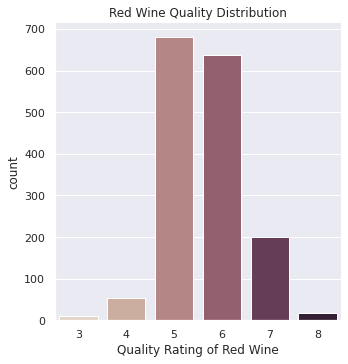

In [ ]:
# show the number of observation in each quality category
sns.catplot(x="quality", kind="count", palette="ch:.25", data=df)
plt.xlabel("Quality Rating of Red Wine")
plt.title("Red Wine Quality Distribution")

Next, I created a correlation matrix to see the strenghth of correlations between variables. Red shades represent a positive relationship and blue shades represent a negative relationship. The darker the shade, the stronger the relationship.

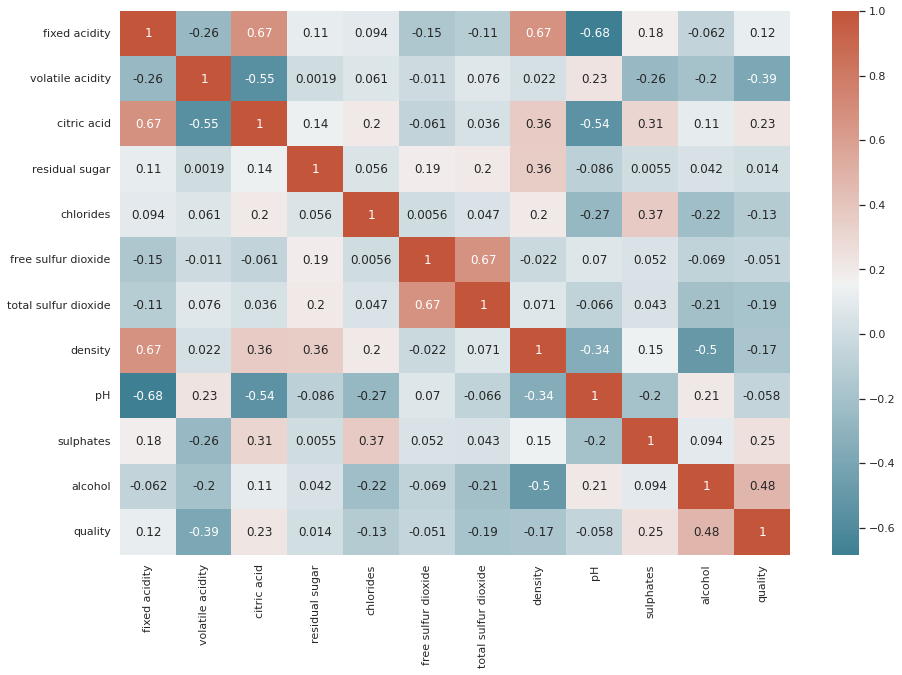

In [ ]:
# Plot correlation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = sns.diverging_palette(220, 20, as_cmap=True))


**Key findings:** 

1 - There's a notable positive relationship between the amount of alcohol and the quality. 

2 - A not too strong positive relationship between sulphates and the quality, and between citric acid and the quality. 

3 - A negative relationship between volatile acidity and the quality. 

4 - The amount of fixed acidity, residual sugar, citric acid, and chlorides increase the density of the wine because they all are positvely correlated to density. 

5 - A postive relationship between fixed acidity and citric acid as citric acid is one type of fixed acids. 


Next, I wanted to know how each attribute influence the quality of the wine, so I created boxplot for each attributes vs. quality. 

<Figure size 432x288 with 0 Axes>

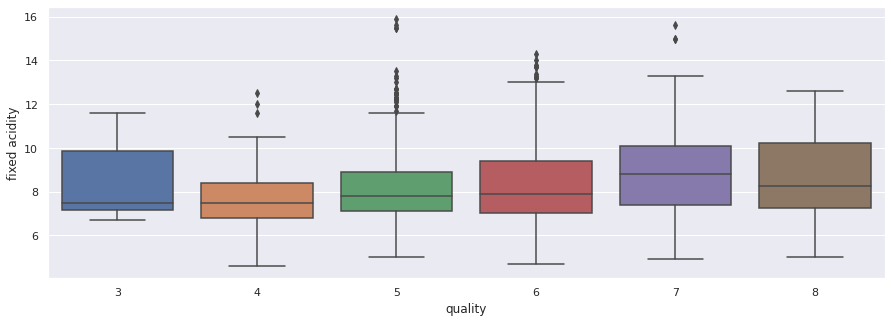

<Figure size 432x288 with 0 Axes>

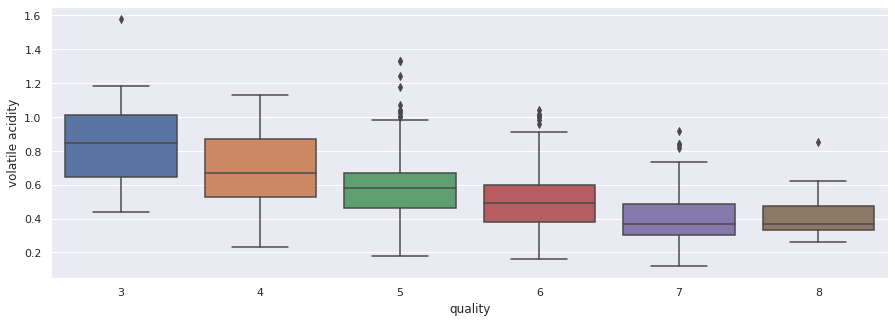

<Figure size 432x288 with 0 Axes>

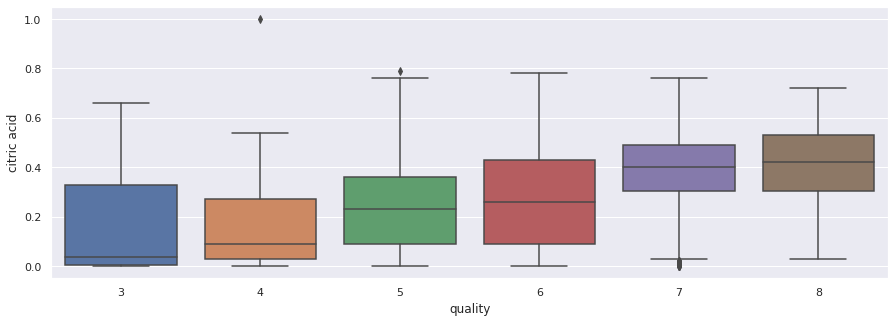

<Figure size 432x288 with 0 Axes>

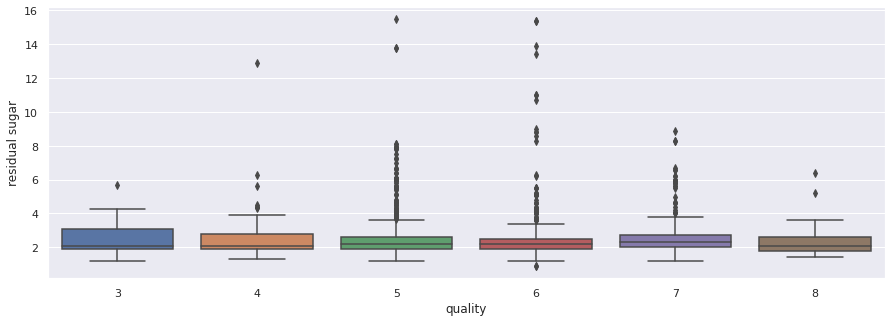

<Figure size 432x288 with 0 Axes>

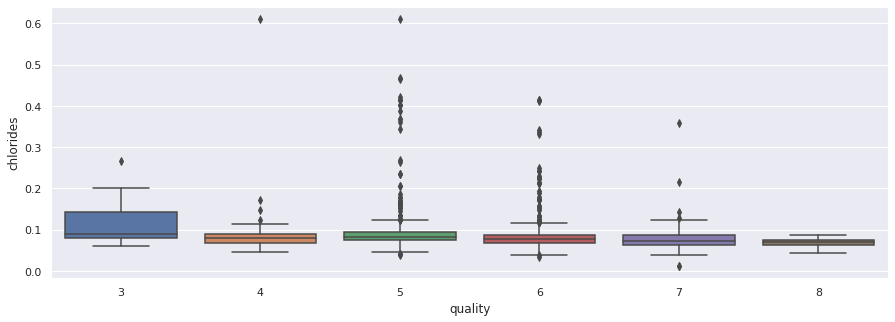

<Figure size 432x288 with 0 Axes>

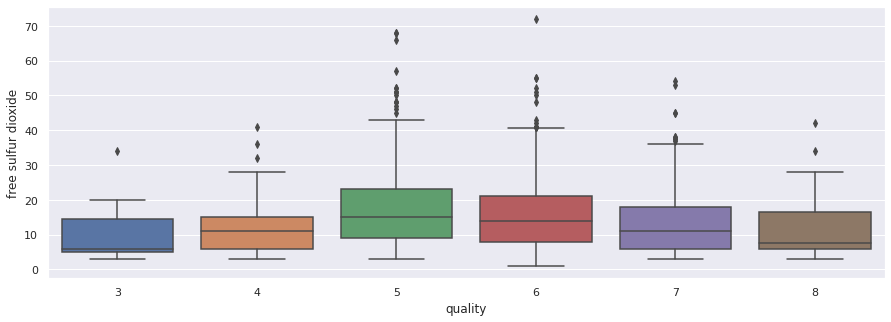

<Figure size 432x288 with 0 Axes>

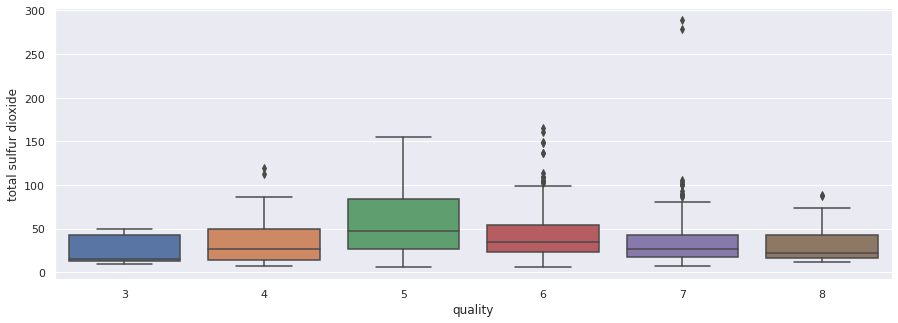

<Figure size 432x288 with 0 Axes>

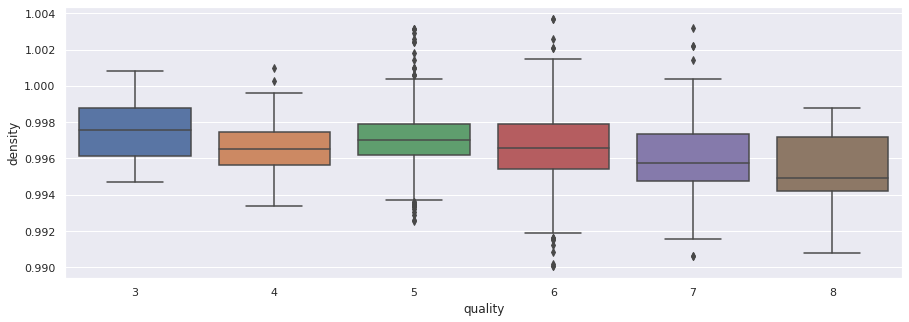

<Figure size 432x288 with 0 Axes>

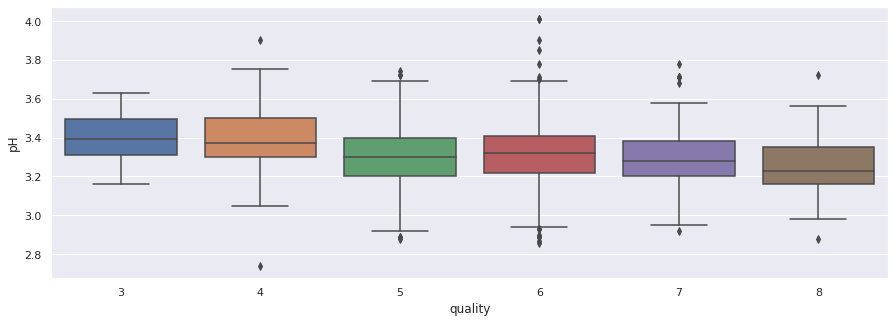

<Figure size 432x288 with 0 Axes>

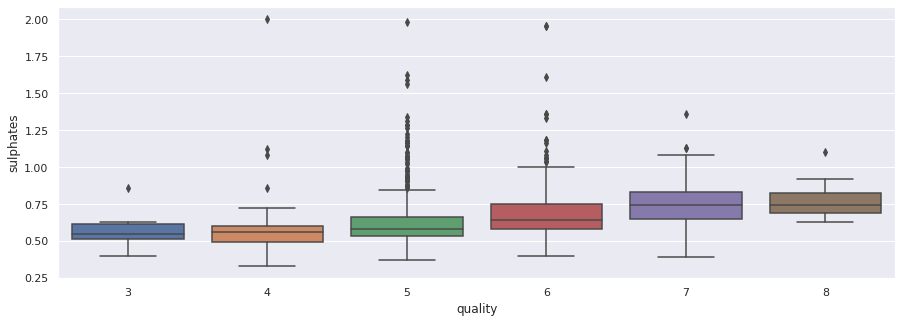

<Figure size 432x288 with 0 Axes>

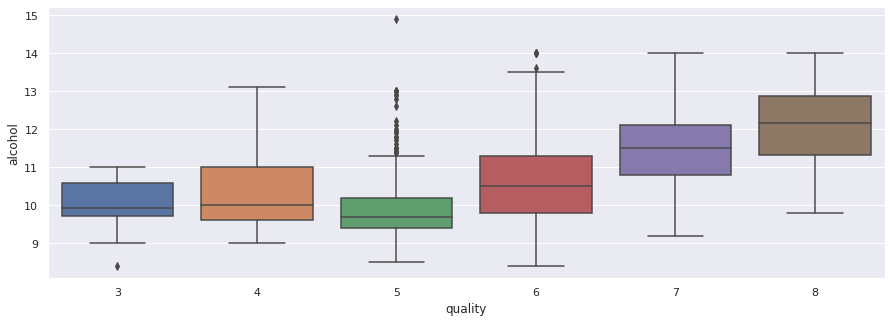

<Figure size 432x288 with 0 Axes>

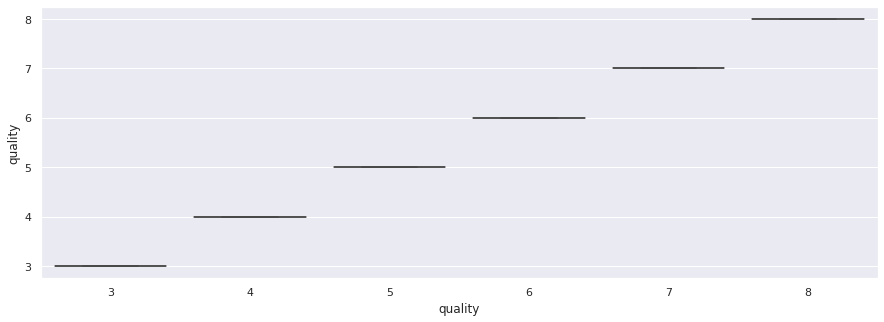

In [330]:
# boxplots for each attribute
for i, col in enumerate(df.columns): 
  plt.figure(i)
  plt.figure(figsize=(15,5))
  sns.boxplot(x="quality", y=col, data=df)
  plt.show()

In [ ]:
# statistic summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Key Findings:** 

Fixed Acidity vs. Quality: Good quality wines have fixed acidity level around 7-10 with a few outliers.  

Volatile Acidity vs. Quality: There's a obvious trend that better the quality, lesser the amount of volatile acidity. Good quality wines have about 0.4 volatile acidity. 

Citric Acid vs. Quality: Better quality wines have higher citric acids. The average level of citric acids for good quality wines is aroud 0.4. 

Residual Sugar vs. Quality: The amount of residual sugar doesn't seem vary too much among different quality wines. However, better quality wines have less outliers with very high residual sugar. We could notice that average quality wines have more outliers with high residual sugar in them. 

Chlorides vs. Quality: Higher quality wines have lower chlorides in them. 

Free Sulfur Dioxide vs. Quality: Good quality wines have relatively less free sulfur dioxide than average quality wines, but not necessarily have the lowest amount because low quality wines also have less free sulful dioxide. 

Total Sulfur Dioxide vs. Quality: Good quality wines have relatively less total sulfur dioxide than average quality wines, but not necessarily have the lowest amount because low quality wines also have less total sulful dioxide. 

Density vs. Quality: Good quality wines have lower density. 

PH vs. Quality: Good quality wines have lower PH. 

Sulphates vs. Quality: Good quality wines have higher amount of sulfates around 0.75 with a few outliers greater than 1. 

Alcohol vs. Quality: Good quality wines have higher percentage of alcohol in them. 

# Decision Tree for Classification

In [ ]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Encode quality score>=7 as good quality 1 and the rest as not good quality 0
df["goodquality"]=[1 if x >= 7 else 0 for x in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# drop original quality column
df1 = df.drop(["quality"], axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# select dependent and independent variables
x = df1.drop("goodquality", axis=1)
y = df1.goodquality

In [ ]:
# split dataset into 80% training set and 20% testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)

# create decision tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", random_state=29)

# train decision tree classifier
clf.fit(x_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(x_test)

# evaluate model accuracy
print("Testing Accuracy score: ", accuracy_score(y_test, y_pred))

Testing Accuracy score:  0.871875


In [ ]:
# print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[253  19]
 [ 22  26]]


The overall testing accuracy score 87%. However, the model is saying it can predit not-good wine 87% of the time and we want to predict good wine. The model isn't giving what I expected because the dataset is imbalanced. There are more not-good wines compared to good wines. 

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       272
           1       0.58      0.54      0.56        48

    accuracy                           0.87       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.87      0.87      0.87       320



Precision tells us how many of good wines are correctly predicted by the model. 

Recall tells us how many predicted good wines are turned out to be actual good wines. 

Both precison and recall score are low for class 1 which is good quality wine. 


## Second Model

If we define wines with 6 or more quality score as good quality wine, will the model accuracy will improve?

In [ ]:
# Encode quality score>=6 as good quality 1 and the rest as not good quality 0
df["goodquality"]=[1 if x >= 6 else 0 for x in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# drop original quality column
df2 = df.drop(["quality"], axis=1)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# select independent and dependent variables
x2 = df2.drop("goodquality", axis=1)
y2 = df2.goodquality

In [ ]:
# split dataset into 80% training set and 20% testing set 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 29)

# create decision tree classifier object
clf2 = DecisionTreeClassifier(criterion="entropy", random_state=29)

# train decision tree classifier
clf2.fit(x2_train, y2_train)

# predict the response for test dataset
y2_pred = clf2.predict(x2_test)

# evaluate model accuracy
print("Testing Accuracy score: ", accuracy_score(y2_test, y2_pred))

Testing Accuracy score:  0.75


In [ ]:
# print confusion matrix
print(confusion_matrix(y2_test, y2_pred))

[[104  34]
 [ 46 136]]


In [ ]:
# print classification report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       138
           1       0.80      0.75      0.77       182

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



Both precision and recall score improved. 

# Plot Decision Tree

In [ ]:
# import library
from sklearn import tree

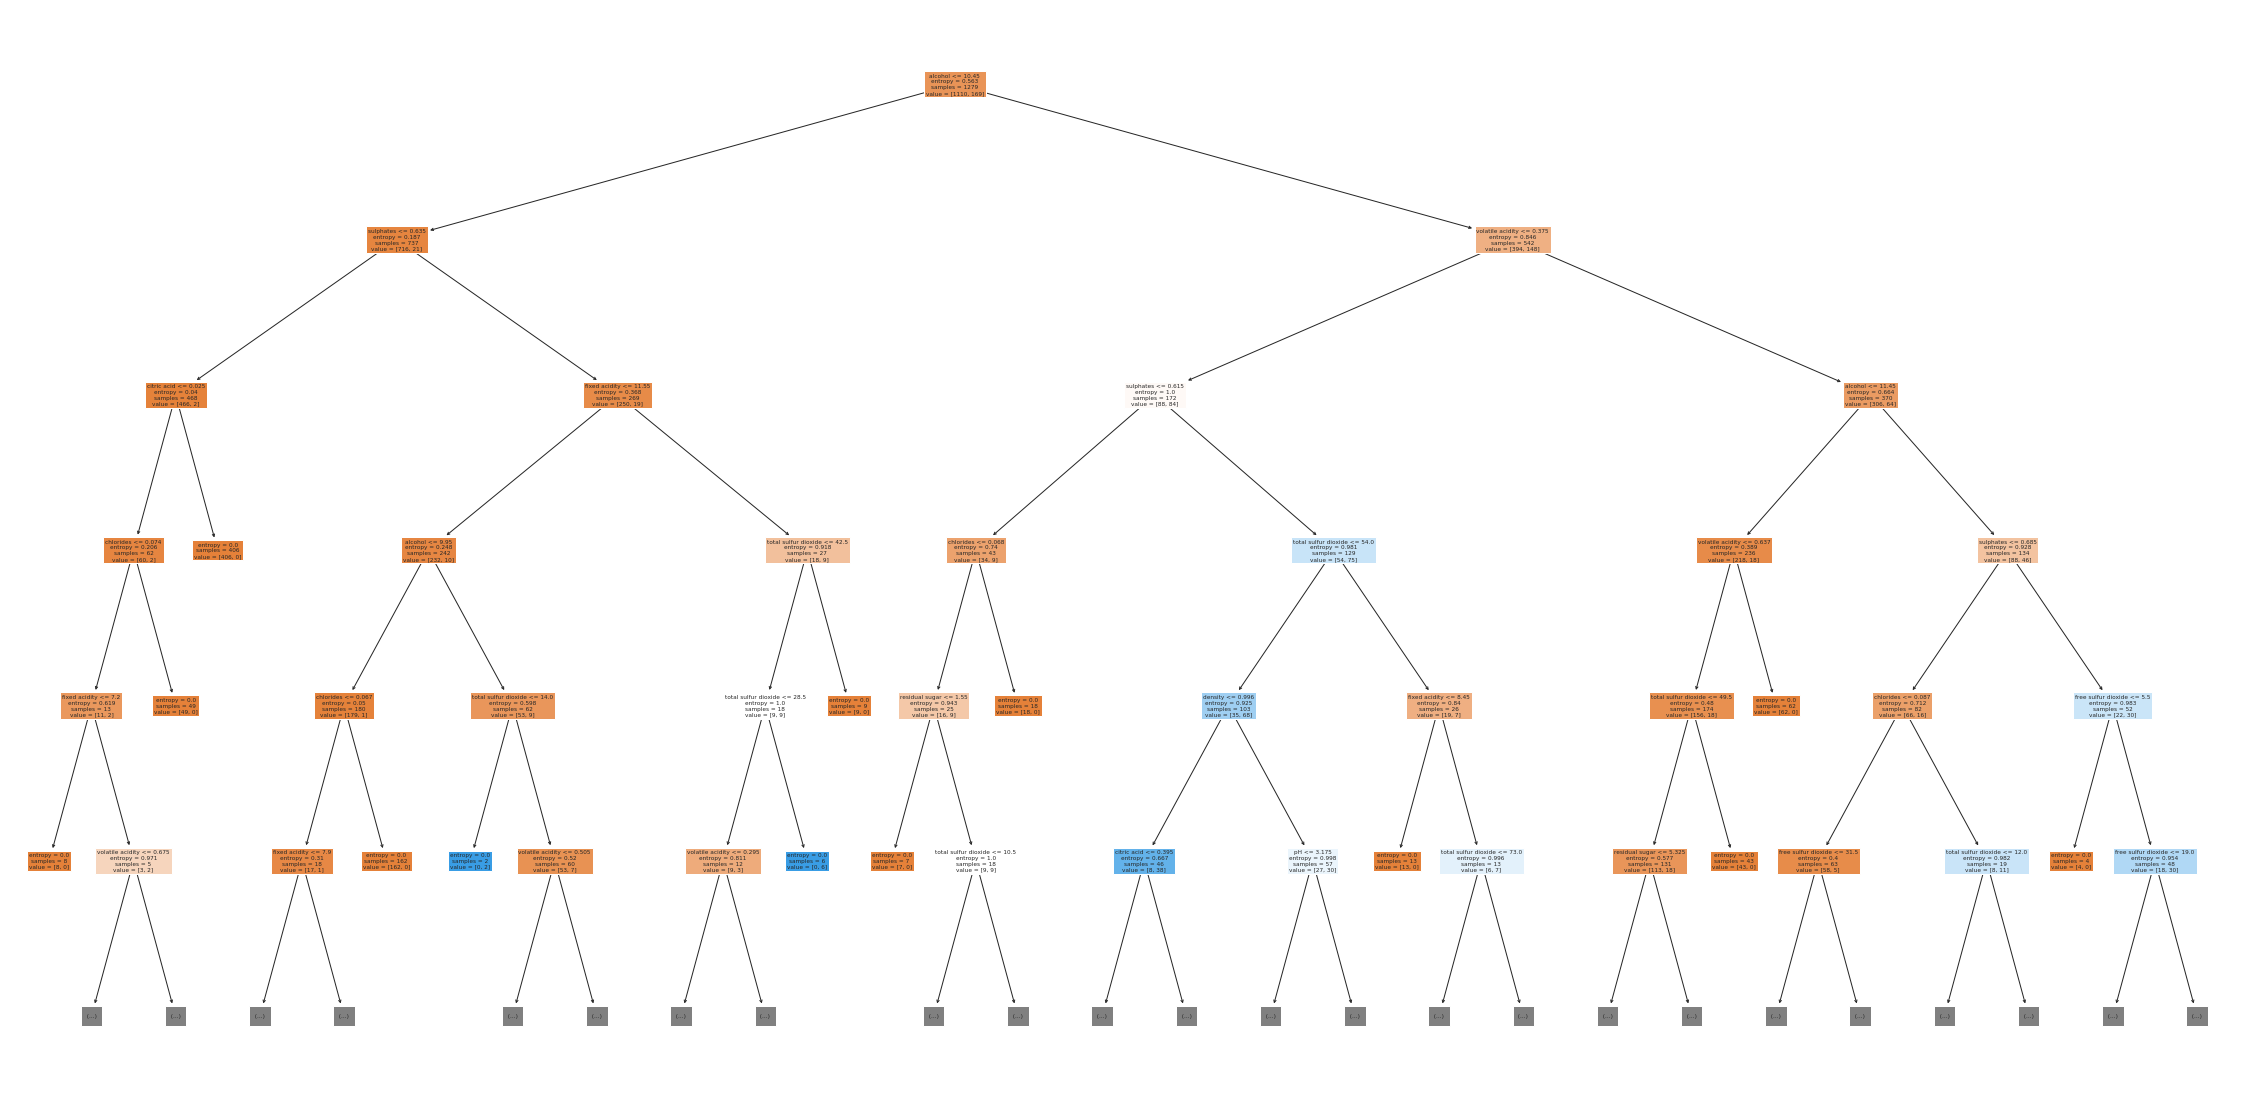

In [ ]:
# plot the decision tree
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(decision_tree=clf, feature_names=x_train.columns, filled = True, max_depth=5)
plt.show()

## Pruning

Except for min_samples_leaf and max_depth, DecisionTreeClassifier provide another approach to control the size of a decision tree called minimum cost-complexity pruning. This technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. 

*Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html*

In [ ]:
# call cost_complexity_pruning_path function to find the effective ccp_alphas and the corresponding impurities
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

This pruning method finds the node with the weakest link which is characterized by an effective alpha. These values of effective alphas are used to prune the decision tree. Nodes with smallest effective alpha are pruned first. 

In [ ]:
# print effective ccp_alphas
ccp_alphas

array([0.        , 0.00156372, 0.00156372, 0.00179739, 0.00183621,
       0.00215394, 0.00215394, 0.00215394, 0.00215394, 0.00215394,
       0.0022943 , 0.00253049, 0.00253723, 0.00253723, 0.00255742,
       0.00267859, 0.00270936, 0.00277473, 0.0027882 , 0.00282224,
       0.00282282, 0.00292051, 0.00292051, 0.00294153, 0.00296729,
       0.00304936, 0.00307618, 0.00314776, 0.00316808, 0.00322973,
       0.00325291, 0.00338024, 0.00347467, 0.00355108, 0.00367065,
       0.00379574, 0.00381594, 0.00388257, 0.00398883, 0.00405402,
       0.00411055, 0.00419585, 0.00430788, 0.0043767 , 0.00458866,
       0.00459203, 0.00468752, 0.00482266, 0.00486385, 0.00504631,
       0.00522319, 0.00527114, 0.00588688, 0.00597133, 0.00601933,
       0.00645758, 0.00696237, 0.00721585, 0.00737802, 0.01062047,
       0.01103396, 0.01108574, 0.01136535, 0.01160611, 0.01561489,
       0.0232427 , 0.0317857 , 0.09719948])

In [ ]:
clfs = []
# pass each values of ccp_alpha to the DecisionTreeClassifier
for ccp_alpha in ccp_alphas: 
  model = DecisionTreeClassifier(random_state=29, ccp_alpha=ccp_alpha)
  model.fit(x_train, y_train)
  clfs.append(model)
# remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 3 with ccp_alpha: 0.01561489205675061


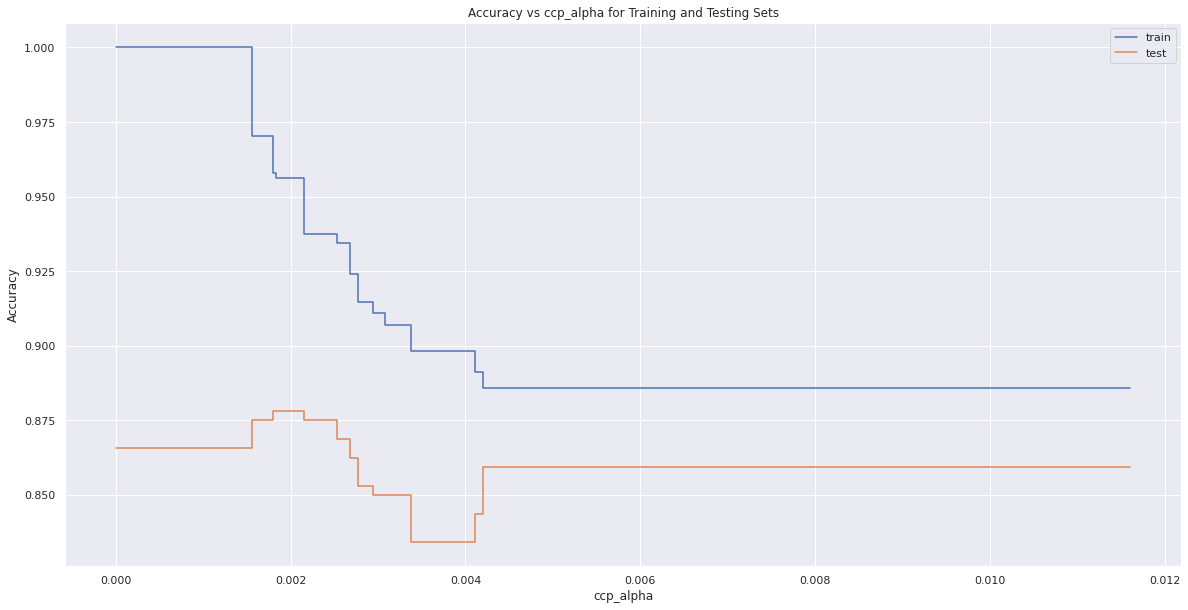

In [ ]:
# find accuracy score of decision tree classifier correspond to ccp_alphas
train_scores = [model.score(x_train, y_train) for model in clfs]
test_scores = [model.score(x_test, y_test) for model in clfs]

# plot the Accuracy vs ccp_alpha for training and testing data
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ccp_alphas, train_scores, label = "train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, label = "test", drawstyle="steps-post")
ax.set_title("Accuracy vs ccp_alpha for Training and Testing Sets")
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()


According to the plot, setting the ccp_alpha to 0.002 maximizes the testing accuracy. 

In [ ]:
# set ccp_alpha=0.002
clf3 = DecisionTreeClassifier(random_state=29, ccp_alpha=0.002)
clf3.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.002, random_state=29)

In [ ]:
pred3 = clf3.predict(x_test)
accuracy_score(y_test, pred3)

0.875

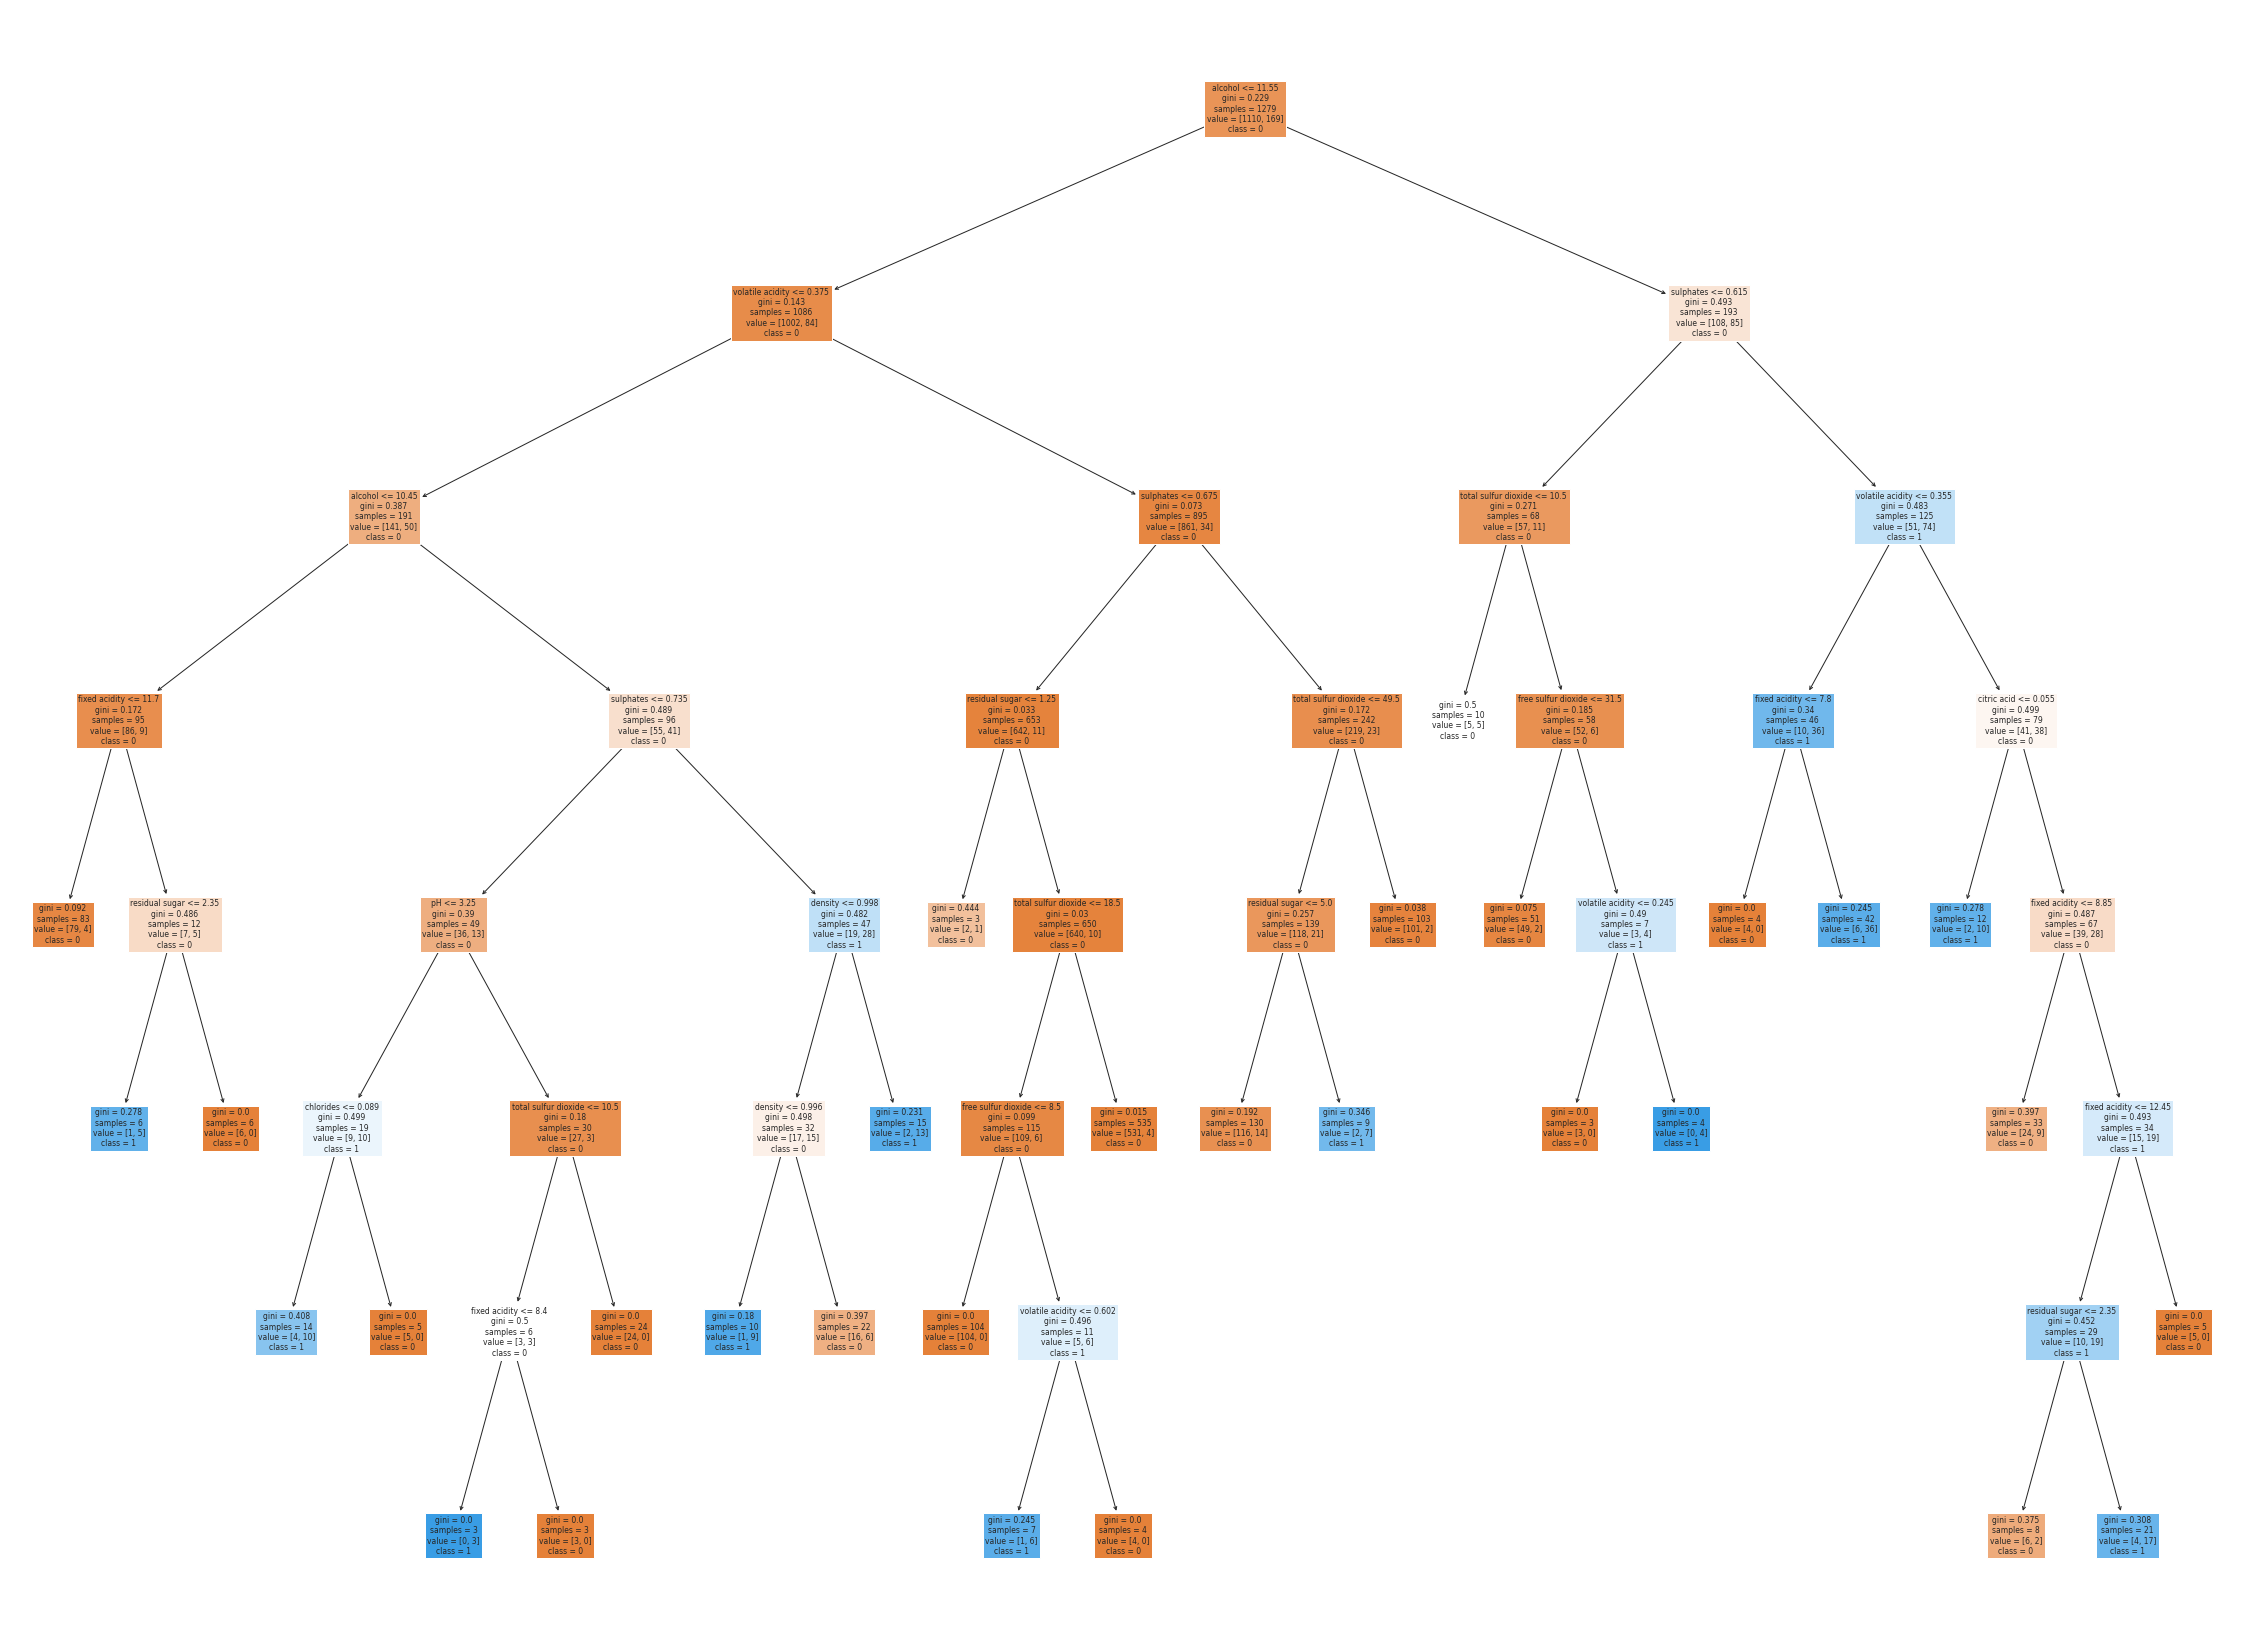

In [ ]:
plt.figure(figsize=(40,30))
tree.plot_tree(decision_tree=clf3, filled=True, feature_names=x_train.columns, class_names=['0','1'])
plt.show()